# Adversarial Variational Optimization: Poisson benchmark

This notebook shows the usage of `cag` with `AVO` (Adversarial Variational Optimization) on the Poisson benchmark. In this inference setting, the goal is to obtain the model parameter $\mathbf{\theta}*$ that is responsible for generating $\mathbf{x}_o \sim p(\mathbf{x}|\mathbf{\theta})$.

In [1]:
import torch
import cag
import matplotlib.pyplot as plt

First, we need to be in the possesion of some $\mathbf{x}_o$:

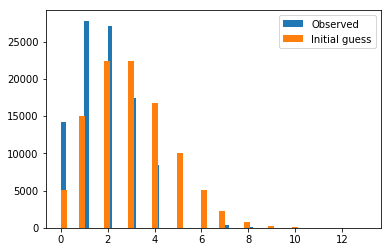

In [2]:
from cag.benchmark.poisson import allocate_observations

theta_true, x_o = allocate_observations(1.95)

# Show some observation, with some initial guess.
plt.hist(x_o.numpy(), bins=50, label="Observed")
plt.hist(allocate_observations(3.)[1].numpy(), bins=50, label="Initial guess")
plt.legend()
plt.show()

Clearly, our initial guess is completely wrong.

## AVO

### Discriminator

In [3]:
num_hidden = 50
discriminator = torch.nn.Sequential(
    torch.nn.Linear(1, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, 1),
    torch.nn.Sigmoid()
)

### Simulator

In [4]:
from cag.benchmark.poisson import PoissonSimulator as Simulator

simulator = Simulator()

### Proposal

In [5]:
from cag.proposal import NormalProposal

proposal = NormalProposal()

### Inference

In [6]:
from cag.method import AdversarialVariationalOptimization

avo = AdversarialVariationalOptimization(simulator, discriminator, proposal)

In [7]:
proposal = avo.infer(x_o, num_steps=5000)

In [8]:
print(proposal._mu)

tensor(1.9531, requires_grad=True)
